En este modulo lo que haremos es tratar de limpiar esta base de datos y adecuar esta misma para tener datos listos para trabajar, basicamente conllevara una transformación de variables y los retos que conllevara el hacer un modelo de regresión lineal

Sabemos que como trabajamos con muchas variables, tendremos que usarlas todas ya que podrian influir en el output con la calificacion final, basandonos en la fuente de la base de datos original, las calificaciones van de 0 a 20, correspondientes a primer, segundo y tercer periodo, g1,g2 y g3 respectivamente.

Ademas de esto, variables como Horas de Estudio, estan medidas de forma semanalmente, para tener en consideracion.

## Metodologia
- Carga y Exploracion de Datos: explorar la cantidad de observaciones, escalas y variables que tenemos
- Preparacion y Limpieza: limpiar datos, llenar huecos, identificar outliers.
- Analisis de posibles relaciones entre variables: analisis mediante matriz de correlacion e interpretacion
- Selección de caracteristicas: seleccion de variables que aportan y cuales no
- Entrenamiento y Evaluacion del modelo: creacion de un modelo de regresion lineal multiple
- Conclusion: conclusion general de esta practica.

# Carga de datos

In [18]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ver dataset

In [19]:
df = pd.read_csv('/content/drive/MyDrive/Inteligencia_Artificial_1/A1.3 Calificaciones.csv')
df

,Escuela,Sexo,Edad,HorasDeEstudio,Reprobadas,Internet,Faltas,G1,G2,G3
0,GP,F,18,2,0,no,6,5,6,6
1,GP,F,17,2,0,yes,4,5,5,6
2,GP,F,15,2,3,yes,10,7,8,10
3,GP,F,15,3,0,yes,2,15,14,15
4,GP,F,16,2,0,no,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,2,2,no,11,9,9,9
391,MS,M,17,1,0,yes,3,14,16,16
392,MS,M,21,1,3,no,3,10,8,7
393,MS,M,18,1,0,yes,0,11,12,10


De entrada podemos ver que tenemos ciertas variables categoricas con 2 clases, debido a que no podemos hacer conclusones con si es hombre o mujer ya que no se puede cuantificar, lo que haremos es que asignaremos valores para cada sexo, en este caso, por ejemplo, asignaremos 0 si es hombre y 1 si es mujer, para eso se puede usar una funcion dummy

Crear nuevas variables a partir de la variable "Sexo", de las personas
M=0, F=1, 0 si son de GP y 1 si son de MS.

In [20]:
# Crear nuevas variables
# para la variable sexo
df['Sexo_bin'] = np.where(df['Sexo'] == 'F',1,0)
df['Escuela_bin'] = np.where(df['Escuela'] == 'GP',1,0)
# Remplazar las categorias variable false/ true para la columna de internet
df['Internet'] = df['Internet'].map({'yes': 1, 'no': 0})

In [21]:
df.drop(columns=['Sexo','Escuela'],axis=1,inplace=True)

In [22]:
# ver cambios en el dataframe
df

,Edad,HorasDeEstudio,Reprobadas,Internet,Faltas,G1,G2,G3,Sexo_bin,Escuela_bin
0,18,2,0,0,6,5,6,6,1,1
1,17,2,0,1,4,5,5,6,1,1
2,15,2,3,1,10,7,8,10,1,1
3,15,3,0,1,2,15,14,15,1,1
4,16,2,0,0,4,6,10,10,1,1
...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,0,11,9,9,9,0,0
391,17,1,0,1,3,14,16,16,0,0
392,21,1,3,0,3,10,8,7,0,0
393,18,1,0,1,0,11,12,10,0,0


Ahora, revisemos si los cambios han echo que nuestras variables cambien de tener categorias a formas numericas

In [23]:
# ver tipos de variables
df.dtypes

,0
Edad,int64
HorasDeEstudio,int64
Reprobadas,int64
Internet,int64
Faltas,int64
G1,int64
G2,int64
G3,int64
Sexo_bin,int64
Escuela_bin,int64


Bien, de esta manera, ya tenemos nuestros datos mejor preparados para analizar, sabemos que queremos ver si hay algo que influya en la calificacion final, de modo que nuestra salida seria G3 y las demas seria las variables que vamos a usar en nuestro dataset

No conforme con eso, veamos si hay algun tipo de huecos o valores atipicos qu pudieran complicar nuestro analisis

In [24]:
# Ver si hay valores faltantes por columna
print(df.isnull().sum())

# O en porcentaje
print(df.isnull().sum() / len(df) * 100)

# Resumen visual
print(df.info())

Edad              0
HorasDeEstudio    0
Reprobadas        0
Internet          0
Faltas            0
G1                0
G2                0
G3                0
Sexo_bin          0
Escuela_bin       0
dtype: int64
Edad              0.0
HorasDeEstudio    0.0
Reprobadas        0.0
Internet          0.0
Faltas            0.0
G1                0.0
G2                0.0
G3                0.0
Sexo_bin          0.0
Escuela_bin       0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Edad            395 non-null    int64
 1   HorasDeEstudio  395 non-null    int64
 2   Reprobadas      395 non-null    int64
 3   Internet        395 non-null    int64
 4   Faltas          395 non-null    int64
 5   G1              395 non-null    int64
 6   G2              395 non-null    int64
 7   G3              395 non-null    int64
 8   Sexo_bin    

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

print("Variables que faltan")
print(df.isnull().sum())
print("\nTotal de filas con algún valor faltante:", df.isnull().any(axis=1).sum())

print("Detectar outliers")
print("="*50)
print(df.describe())

Variables que faltan
Edad              0
HorasDeEstudio    0
Reprobadas        0
Internet          0
Faltas            0
G1                0
G2                0
G3                0
Sexo_bin          0
Escuela_bin       0
dtype: int64

Total de filas con algún valor faltante: 0
Detectar outliers
             Edad  HorasDeEstudio  Reprobadas    Internet      Faltas  \
count  395.000000      395.000000  395.000000  395.000000  395.000000   
mean    16.696203        2.035443    0.334177    0.832911    5.708861   
std      1.276043        0.839240    0.743651    0.373528    8.003096   
min     15.000000        1.000000    0.000000    0.000000    0.000000   
25%     16.000000        1.000000    0.000000    1.000000    0.000000   
50%     17.000000        2.000000    0.000000    1.000000    4.000000   
75%     18.000000        2.000000    0.000000    1.000000    8.000000   
max     22.000000        4.000000    3.000000    1.000000   75.000000   

               G1          G2          G3    S

##Ver outliers de la variable faltas
Bien, podemos reconocer que en este caso el outlier mas visible es el de la variable reprobadas, ya que el valor maximo es 75, es decir, alguien tuvo 75 faltas, podria ser un error, tal vez no, pero vamos a tratarlo como se debe, en este caso utilizaremos el metodo de tukey, donde definiremos el rango intercuartil q1-q3 y los valores que se encuentren fuera de ese rango los catalogaremos como outlier o datos atipicos.

In [26]:
# Aplicar método de Tukey a la variable "Faltas"
Q1 = df['Faltas'].quantile(0.25)
Q3 = df['Faltas'].quantile(0.75)
IQR = Q3 - Q1

# Límites con k=1.5 (estándar de Tukey)
k = 1.5
limite_inferior = Q1 - k * IQR
limite_superior = Q3 + k * IQR

print("="*50)
print("MÉTODO DE TUKEY - Variable: Faltas")
print("="*50)
print(f"Q1 (percentil 25): {Q1}")
print(f"Q3 (percentil 75): {Q3}")
print(f"IQR (Q3 - Q1): {IQR}")
print(f"\nCon k = {k}:")
print(f"Límite inferior: {limite_inferior}")
print(f"Límite superior: {limite_superior}")

# Identificar outliers
outliers = df[(df['Faltas'] < limite_inferior) | (df['Faltas'] > limite_superior)]
print(f"\n🔍 Total de outliers detectados: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
print(f"\nValores atípicos encontrados:")
print(outliers['Faltas'].sort_values(ascending=False).values)

MÉTODO DE TUKEY - Variable: Faltas
Q1 (percentil 25): 0.0
Q3 (percentil 75): 8.0
IQR (Q3 - Q1): 8.0

Con k = 1.5:
Límite inferior: -12.0
Límite superior: 20.0

🔍 Total de outliers detectados: 15 (3.80%)

Valores atípicos encontrados:
[75 56 54 40 38 30 28 26 25 24 23 22 22 22 21]


Listo!, hemos identificado los valores atipicos de la variable faltas, muy probablemente haya sido un error de captura al momento de ingresar los datos, partiendo de eso, afortunadamente esos outliers conforman solamente el 3.8% de nuestros datos totales, de modo que si los quitamos para que no haya mucho ruido en los datos, no deberia repercutir en el analisis, procedamos a quitar esas revisiones.

Asi mismo, vamos a calcular nuevamente ciertas medidas estadisticas para ver como cambio nuestro dataset al quitar esos datos.

In [27]:
# quitar outliers

# Antes de eliminar
print(f"Tamaño original del dataset: {len(df)} filas")

# Eliminar outliers en Faltas
df_limpio = df[df['Faltas'] <= limite_superior].copy()

# Después de eliminar
print(f"Tamaño después de eliminar outliers: {len(df_limpio)} filas")
print(f"Filas eliminadas: {len(df) - len(df_limpio)} ({(len(df) - len(df_limpio))/len(df)*100:.2f}%)")

# Verificar que se eliminaron
print(f"\nNuevo máximo de Faltas: {df_limpio['Faltas'].max()}")
print(f"Nueva media de Faltas: {df_limpio['Faltas'].mean():.2f}")

# Actualizar el dataframe
df = df_limpio

Tamaño original del dataset: 395 filas
Tamaño después de eliminar outliers: 380 filas
Filas eliminadas: 15 (3.80%)

Nuevo máximo de Faltas: 20
Nueva media de Faltas: 4.60


Como podemos ver, efectivamente se eliminaron los 15 datos atipicos de los 395 que teniamos originalmente, dejandonos con 380 datos sin valores atipicos en la columna de faltas.

Ahora, volvamos a describir de forma estadistica nuestro conjunto de datos.

In [11]:
print(df.describe())

             Edad  HorasDeEstudio  Reprobadas    Internet      Faltas  \
count  380.000000      380.000000  380.000000  380.000000  380.000000   
mean    16.671053        2.042105    0.326316    0.826316    4.602632   
std      1.274762        0.846109    0.747091    0.379337    4.968236   
min     15.000000        1.000000    0.000000    0.000000    0.000000   
25%     16.000000        1.000000    0.000000    1.000000    0.000000   
50%     17.000000        2.000000    0.000000    1.000000    3.000000   
75%     18.000000        2.000000    0.000000    1.000000    7.000000   
max     22.000000        4.000000    3.000000    1.000000   20.000000   

               G1          G2          G3    Sexo_bin  Escuela_bin  
count  380.000000  380.000000  380.000000  380.000000   380.000000  
mean    10.921053   10.723684   10.421053    0.515789     0.878947  
std      3.312896    3.772553    4.612313    0.500409     0.326618  
min      3.000000    0.000000    0.000000    0.000000     0.000000

Efectivamente como podemos ver, ahora nuestro valor maximo de faltas es de 20, lo cual sigue siendo alto, hablando relativamente, pero ahora es algo que esta dentro de nuestro rango de datos.

Bien, ahora seria interesante crear nuevas variables a partir de unas que ya existe, in acercamiento de esto podria ser la variable de horas de estudio, podemos definir rangos de forma binaria, es decir, catalogarlos como, estudio bajo, estudio moderado y estudio alto, 0 y 1 si es que aplica y esta dentro del rango

## Crear variables a partir de horas de estudio (semanal)

In [28]:
df['Estudio_bajo'] = np.where(df['HorasDeEstudio'] == 1, 1, 0)

df['Estudio_moderado'] = np.where((df['HorasDeEstudio'] >= 2) & (df['HorasDeEstudio'] <= 3), 1, 0)

df['Estudio_alto'] = np.where(df['HorasDeEstudio'] == 4, 1, 0)


In [29]:
# ver cambios efectuados
df.head()

,Edad,HorasDeEstudio,Reprobadas,Internet,Faltas,G1,G2,G3,Sexo_bin,Escuela_bin,Estudio_bajo,Estudio_moderado,Estudio_alto
0,18,2,0,0,6,5,6,6,1,1,0,1,0
1,17,2,0,1,4,5,5,6,1,1,0,1,0
2,15,2,3,1,10,7,8,10,1,1,0,1,0
3,15,3,0,1,2,15,14,15,1,1,0,1,0
4,16,2,0,0,4,6,10,10,1,1,0,1,0


Nota: en este caso no eliminamos la variable original de horas de estudio ya que nos sirve como referencia a las demas, por lo tanto la dejaremos dentro del dataset

## Matriz de correlación

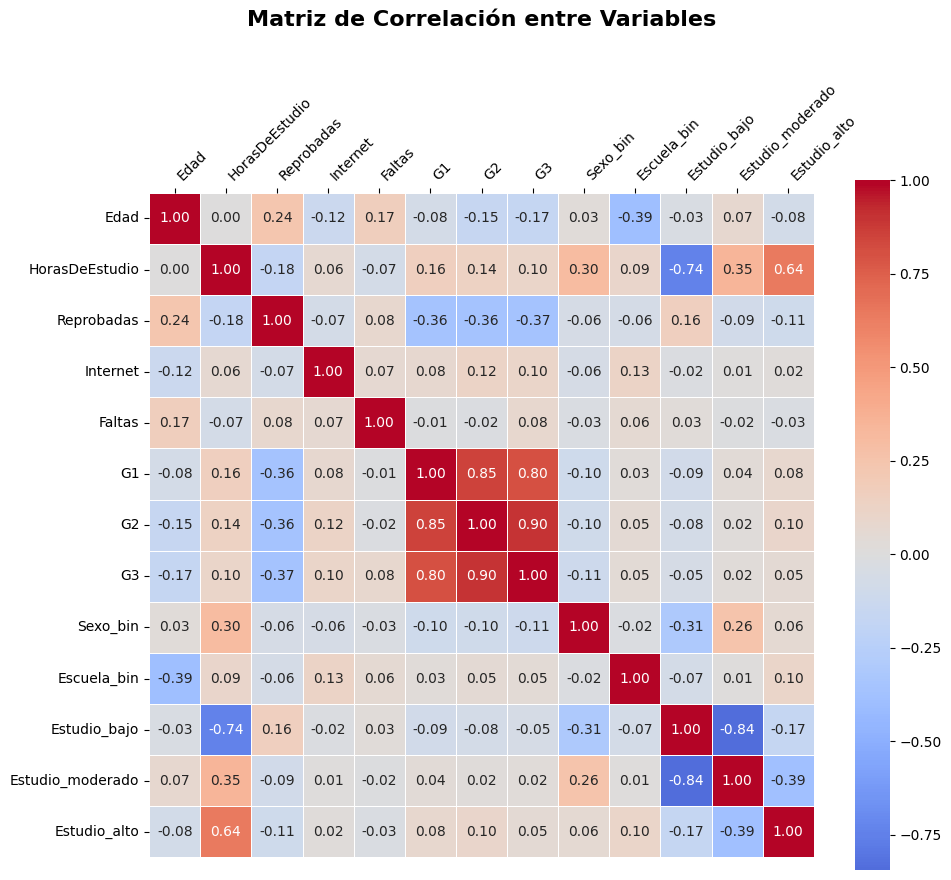

CORRELACIONES CON G3 (Calificación Final)
G3                  1.000000
G2                  0.902882
G1                  0.798394
HorasDeEstudio      0.101594
Internet            0.100722
Faltas              0.084467
Estudio_alto        0.050327
Escuela_bin         0.046183
Estudio_moderado    0.021631
Estudio_bajo       -0.052412
Sexo_bin           -0.112634
Edad               -0.171142
Reprobadas         -0.365408
Name: G3, dtype: float64


In [30]:
# Calcular matriz de correlación
correlacion = df.corr()

# Visualización con heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlacion,
            annot=True,           # Mostrar valores
            cmap='coolwarm',      # Colores
            center=0,             # Centrar en 0
            fmt='.2f',            # 2 decimales
            square=True,          # Celdas cuadradas
            linewidths=0.5,       # Líneas entre celdas
            cbar_kws={"shrink": 0.8},
            xticklabels=correlacion.columns,  # Etiquetas en X
            yticklabels=correlacion.columns)  # Etiquetas en Y

plt.tick_params(axis='x', labeltop=True, labelbottom=False, top=True, bottom=False)  # Mover etiquetas X arriba
plt.xticks(rotation=45, ha='left')  # Rotar etiquetas
plt.title('Matriz de Correlación entre Variables', fontsize=16, fontweight='bold', pad=40)  # Más espacio para el título
plt.tight_layout()
plt.show()

# Ver las correlaciones con la variable objetivo (G3)
print("="*50)
print("CORRELACIONES CON G3 (Calificación Final)")
print("="*50)
print(correlacion['G3'].sort_values(ascending=False))

Interesante matriz, de ella podemos apreciar cierto comportamiento o relacion de los datos que tenemos, como poe ejemplo, que las variables g1 y g2 estan muy fuertemente relacionadas a la salida,(g3), esto puede ser algo problematico, ya que al tener una correlacion muy alta, aproximadamente de 0.8 - 90, casi estan prediciendo en su mayoria la salida, debido a que conforman una parte de ella por lo que probablemente tengamos que decidir si incluirlas en el modelo o solo concentrarnos en la calificacion final a partir de las demas variables.

Ademas de eso, podriamos, naturalmente uno podria pensar que entre mas horas de estudio se lleven a cabo, mayor sera la calificacion final, y si, observamos una correlacion de 0.10 (positiva, pero debil), es decir, si influye, pero no de forma significativa.

Adicionalmente, podemos ver que las variables que acabamos de crear a partir del estudio tienen una correlacion que va en ascendencia, eso es buena señal.

Fuera de eso, seria muy interesante ver el comportamiento de los datos si usaramos G1 y G2, asi como si los excluyeramos.

Exploremos los dos casos, de igual forma, naturalmente uno tendra mejor resultado que otro, asi a simple vista, si solo nos concentramos en la calificacion final (g3), probablemente si excluimos las variables, tendremos una mejor prediccion de datos que no este en su mayor parte dictaminada por las calificaciones de distintos periodos.

Si eliminamos ciertas variables (como G1 y G2), las demás variables
tendrán coeficientes (β₁, β₂, etc.) con mayor magnitud. Esto no significa
que estas variables se vuelvan  más importantes, sino que ahora deben "explicar" más varianza en la salida (G3) al no tener el
apoyo de las variables eliminadas. En otras palabras, su contribución
relativa al modelo aumenta para compensar la información perdida.

## Regresión Lineal Multiple CON g1 y g2

Para estos dos datos, usemos el 70% de los datos originales ya que en si nuestro dataset de 380 observaciones, es relativamente pequeño, de modo que hay que balancearlo, para el training de los dos casos, obteniendo datos como el pvalue, RSE, RSS, F statistic, antes y despues del training para ver como se comporta.

Importar librerias y partir datos en train y test

In [44]:
# Genera datos de entrenamiento
train = df.sample(frac = 0.7)
# Genera datos de validación
test = df.drop(train.index)
# Imprime dimensiones de datos de entrenamiento
print("Train:", train.shape)
# Imprime dimensiones de datos de prueba
print("Test:",test.shape)
# Imprime primeras 5 filas de datos de entrenamiento
print(train.head())

Train: (266, 13)
Test: (114, 13)
     Edad  HorasDeEstudio  Reprobadas  Internet  Faltas  G1  G2  G3  Sexo_bin  \
206    16               2           3         1       5   7   7   7         1   
45     15               2           0         1       8   8   8   6         1   
349    18               1           1         1      10  11  13  13         0   
5      16               2           0         1      10  15  15  15         0   
244    18               3           0         1       0   7   0   0         1   

     Escuela_bin  Estudio_bajo  Estudio_moderado  Estudio_alto  
206            1             0                 1             0  
45             1             0                 1             0  
349            0             1                 0             0  
5              1             0                 1             0  
244            1             0                 1             0  


## Entrenar Modelo

Enhorabuena, vemos que tenemos una R^2 ajustada muy alta, de 0.8, lo cual nos dice que nuestro modelo explica el 80% del conjunto de datos que tenemos, asi mismo podemos notar que hay ciertas variables las cuales debido a su pvalue, es probable que no aporten mucho al dataset, tales como, 'HorasDeEstudio','Reprobadas'e 'internet'

In [45]:
# Importar librería
import statsmodels.api as sm
# Generar elemento X
X = train.drop('G3', axis = 1)
# Generar elemento Y
Y = train.G3
# Definir el tipo de modelo
model = sm.OLS(Y,sm.add_constant(X))
# Ajustar el modelo para obtener resultados
results = model.fit()
# Imprimir un resumen de los resultados
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     125.8
Date:                Thu, 05 Feb 2026   Prob (F-statistic):           4.78e-96
Time:                        01:44:20   Log-Likelihood:                -543.73
No. Observations:                 266   AIC:                             1111.
Df Residuals:                     254   BIC:                             1154.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7331      1.563  

## Interpretación

De esta tabla de datos podemos interpretar lo siguiente:

- Edad: Un coeficiente negativo indica que, a mayor edad, la calificación tiende a bajar ligeramente.

- Repetición y acceso a internet: Si repites el año y tienes internet, eso también afecta negativamente la calificación.

- Escuela y sexo: La variable de sexo, con un coeficiente negativo para mujeres, muestra una diferencia de calificación, aunque pequeña.

- Horas de estudio: Lo interesante es que, en este caso, estudiar más no necesariamente mejora la calificación; al contrario, podría estar relacionado con una menor calificación.

## Validar modelo en test

In [46]:
import scipy.stats as st
yhat = results.predict(sm.add_constant(X))
ybar = np.mean(Y)
ESS = sum((yhat - ybar)**2)
m = X.shape[1]
EMS = ESS / m
RSS = sum((Y - yhat)**2)
n = X.shape[0]
RMS = RSS / (n - m - 1)
F = EMS / RMS
pval = st.f.sf(F, m, n - m - 1)
print("F =", F)
print("p-value =", pval)

F = 114.83046878759362
p-value = 5.490568541948647e-95


Como las variables, Escuela_bin y Sexo_bin,  tirenen un pvalue de casi 50%, vamos a quitarlas y a definir un nuevo dataset sin esas variables

In [47]:
# generar nuevos modelos sin las variables con un pvalue muy grande
XNew = X.drop(['Escuela_bin','Sexo_bin'], axis = 1)
modelNew = sm.OLS(Y,sm.add_constant(XNew))
resultsNew = modelNew.fit()

## Calcular metricas estadisticas

In [51]:
yhatNew = resultsNew.predict(sm.add_constant(XNew))
RSSNew = sum((Y-yhatNew)**2)
EMSNew = (RSSNew - RSS) / 1
FNew = EMSNew / RMS
pvalNew = st.f.sf(FNew, 1, n-m-1)
t = np.sqrt(FNew)
print("New F =", FNew)
print("t-value =", t)
print("p-value =", pvalNew)
print("OLS's p-value Escuela =", results.pvalues["Escuela_bin"])
print("OLS's p-value Sexo =", results.pvalues["Sexo_bin"])


New F = 0.7352437702228594
t-value = 0.8574635678691307
p-value = 0.392000256699059
OLS's p-value Escuela = 0.5411805124962055
OLS's p-value Sexo = 0.5421269209145818


## Generar nuevos elementos de test

In [53]:
# Genera el elemento XTest
XTest = test.drop('G3', axis = 1)
yhatTest = results.predict(sm.add_constant(XTest))
YTest = test.G3
RSSTest = sum((YTest-yhatTest)**2)
TSSTest = sum((YTest-np.mean(YTest))**2)
nTest = XTest.shape[0]
mTest = XTest.shape[1]
RSETest = np.sqrt(RSSTest/(nTest))
R2Test = 1 - RSSTest / TSSTest
print("RSE =", RSETest)
print("R^2 =", R2Test)


RSE = 1.8853513045702408
R^2 = 0.8046668364678251


Vemos que tenemos un R^2 de 0.8, es decir, nuestro modelo explica el 80% de los datos del dataset, un buen numero hablando relativamente, y con un RSE de 1.88 de variacion en cuanto a la salida

## Grafica de predicción vs datos reales (CON G1 Y G2)

Text(0.5, 1.0, 'Predicciones vs Valores Reales')

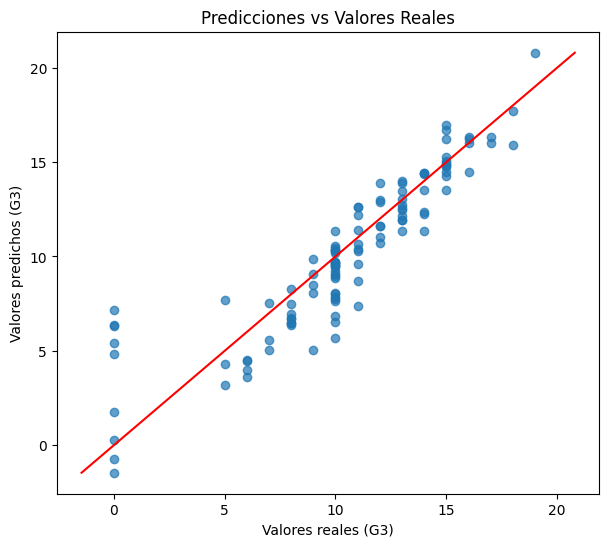

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Predicciones
yHatTest = results.predict(sm.add_constant(XTest))
YTest = test["G3"]

# Gráfica
plt.figure(figsize=(7,6))
plt.scatter(YTest, yHatTest, alpha=0.7)

# Línea ideal (predicción perfecta)
min_val = min(YTest.min(), yHatTest.min())
max_val = max(YTest.max(), yHatTest.max())
plt.plot([min_val, max_val], [min_val, max_val],color='red')

plt.xlabel("Valores reales (G3)")
plt.ylabel("Valores predichos (G3)")
plt.title("Predicciones vs Valores Reales")


Bien, ahora hagamos lo mismo pero con algunos ajustes, vimos que sorprendentemente estudiar mas no siempre significa meyor calificación y otras curiosidades del modelo, pero podemos observar que practicamente g1 y g2 predominan el modelo con un pvalue practicamente de 0, es decir, son resultados previos, de modo que seria interesante ver como se comportan esos modelos sin alguna de estas variables, esto ademas de el summary del modelo nos dice que hay una gran multicolinearidad de variables, lo cual puede ser un problema

## Modelo sin G1 y G2

In [105]:

# particion de datos
train2 = df.sample(frac=0.7, random_state=1)
test2 = df.drop(train2.index)

print("Train:", train2.shape)
print("Test:", test2.shape)
print(train2.head())


Train: (266, 13)
Test: (114, 13)
     Edad  HorasDeEstudio  Reprobadas  Internet  Faltas  G1  G2  G3  Sexo_bin  \
251    16               2           0         1       6   7  10  10         0   
184    16               2           0         1      14  12  13  12         1   
288    18               3           0         1       6  15  14  14         0   
189    17               2           0         0       4   8   9  10         0   
240    17               2           0         1      14  12  12  12         0   

     Escuela_bin  Estudio_bajo  Estudio_moderado  Estudio_alto  
251            1             0                 1             0  
184            1             0                 1             0  
288            1             0                 1             0  
189            1             0                 1             0  
240            1             0                 1             0  


In [106]:
## ================= MODELO 1: CON G1 Y G2 =================

import statsmodels.api as sm
import numpy as np
import scipy.stats as st

X_nog = train2.drop('G3', axis=1)
Y_nog = train2['G3']

model_nog = sm.OLS(Y_nog, sm.add_constant(X_nog))
results_nog = model_nog.fit()


# ---- Estadísticos manuales ----
yhat_nog = results_nog.predict(sm.add_constant(X_nog))
ybar_nog = np.mean(Y_nog)

ESS_nog = sum((yhat_nog - ybar_nog)**2)
RSS_nog = sum((Y_nog - yhat_nog)**2)

m_nog = X_nog.shape[1]
n_nog = X_nog.shape[0]

EMS_nog = ESS_nog / m_nog
RMS_nog = RSS_nog / (n_nog - m_nog - 1)

F_nog = EMS_nog / RMS_nog
pval_nog = st.f.sf(F_nog, m_nog, n_nog - m_nog - 1)

print("F_nog =", F_nog)
print("p-value =", pval_nog)



F_nog = 105.1741451830113
p-value = 5.728133460402917e-91


In [107]:

## ================= MODELO 2: SIN G1 Y G2 =================

XNew_nog = X_nog.drop(['G1', 'G2'], axis=1)

modelNew_nog = sm.OLS(Y_nog, sm.add_constant(XNew_nog))
resultsNew_nog = modelNew_nog.fit()
print(resultsNew_nog.summary())


# ---- Comparación F entre modelos ----
yhatNew_nog = resultsNew_nog.predict(sm.add_constant(XNew_nog))
RSSNew_nog = sum((Y_nog - yhatNew_nog)**2)

df_diff = 2  # quitamos G1 y G2
FNew_nog = ((RSSNew_nog - RSS_nog) / df_diff) / RMS_nog
pvalNew_nog = st.f.sf(FNew_nog, df_diff, n_nog - m_nog - 1)

print("New F =", FNew_nog)
print("p-value cambio modelo =", pvalNew_nog)

print("OLS p-value G1 =", results_nog.pvalues["G1"])
print("OLS p-value G2 =", results_nog.pvalues["G2"])


                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     7.714
Date:                Thu, 05 Feb 2026   Prob (F-statistic):           4.93e-10
Time:                        04:51:36   Log-Likelihood:                -755.38
No. Observations:                 266   AIC:                             1531.
Df Residuals:                     256   BIC:                             1567.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.8579      3.403  

In [108]:


## ================= TEST MODELO 1 (CON G1 Y G2) =================

XTest_full = test2.drop('G3', axis=1)
YTest = test2['G3']

yhatTest_full = results_nog.predict(sm.add_constant(XTest_full))

RSSTest_full = sum((YTest - yhatTest_full)**2)
TSSTest_full = sum((YTest - np.mean(YTest))**2)

RSETest_full = np.sqrt(RSSTest_full / len(YTest))
R2Test_full = 1 - RSSTest_full / TSSTest_full

print("\nTEST Modelo con G1 y G2")
print("RSE =", RSETest_full)
print("R² =", R2Test_full)


TEST Modelo con G1 y G2
RSE = 1.8466723286352258
R² = 0.8281385543177565


In [109]:

## ================= TEST MODELO 2 (SIN G1 Y G2) =================

XTest_nog = test2.drop(['G3', 'G1', 'G2'], axis=1)

yhatTest_nog = resultsNew_nog.predict(sm.add_constant(XTest_nog))

RSSTest_nog = sum((YTest - yhatTest_nog)**2)
TSSTest_nog = sum((YTest - np.mean(YTest))**2)

RSETest_nog = np.sqrt(RSSTest_nog / len(YTest))
R2Test_nog = 1 - RSSTest_nog / TSSTest_nog

print("\nTEST Modelo SIN G1 y G2")
print("RSE =", RSETest_nog)
print("R² =", R2Test_nog)



TEST Modelo SIN G1 y G2
RSE = 4.231572012426069
R² = 0.09759342767169665


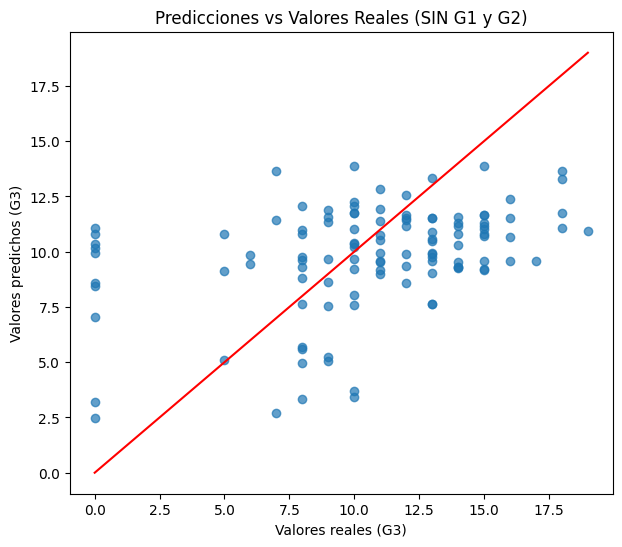

In [110]:

## ================= GRÁFICA MODELO SIN G1 Y G2 =================

import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.scatter(YTest, yhatTest_nog, alpha=0.7)

min_val = min(YTest.min(), yhatTest_nog.min())
max_val = max(YTest.max(), yhatTest_nog.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red')

plt.xlabel("Valores reales (G3)")
plt.ylabel("Valores predichos (G3)")
plt.title("Predicciones vs Valores Reales (SIN G1 y G2)")
plt.show()

Conclusion, con este ultimo acercamiento, podemos ver que, en efecto las variables de g1 y g2 son muy vitales para el estudio de la salida de este dataset, asi mismo notese como ahora la dispersion de los datos reales y los datos predichos es mucho mayor, teniendo un R^2 de 9% de explicacion de los datos reales, a su vez, el RSE aumento a un 4.2, en unidades de la salida.